# Convolutional Neural Network 합성곱신경망





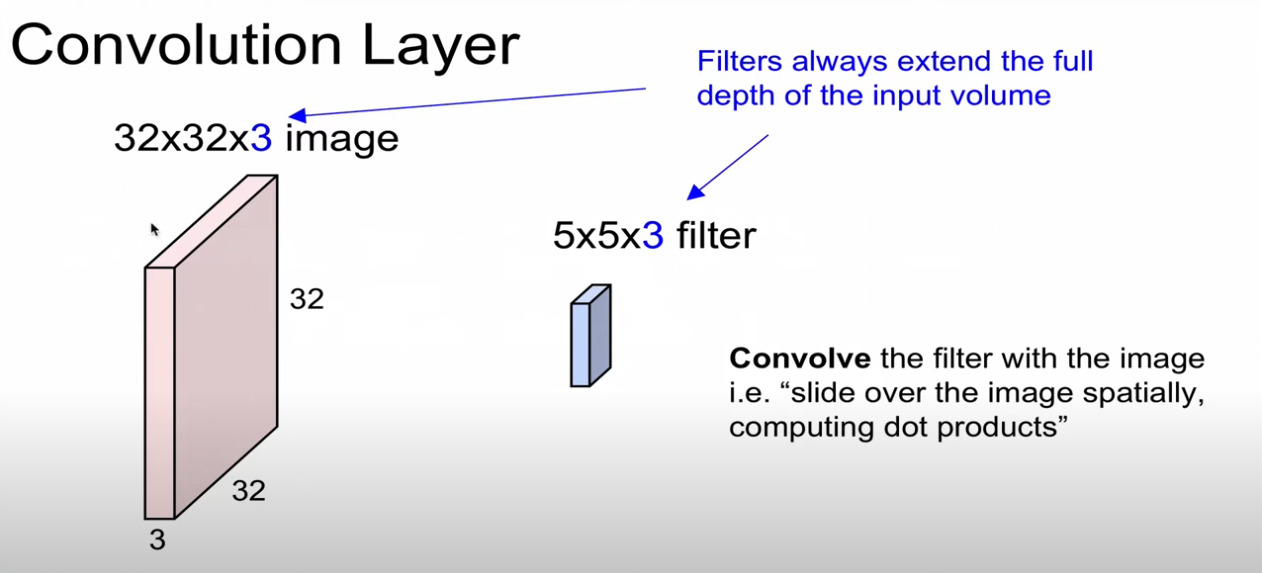

- 필터가 이미지를 좌우상하 convoluition(합성곱)을 하면서 이미지 전체를 훓는다.

- 여기서 주목해야 할 부분은 Width와 height은 다르지만 depth는 같다는 부분이다.

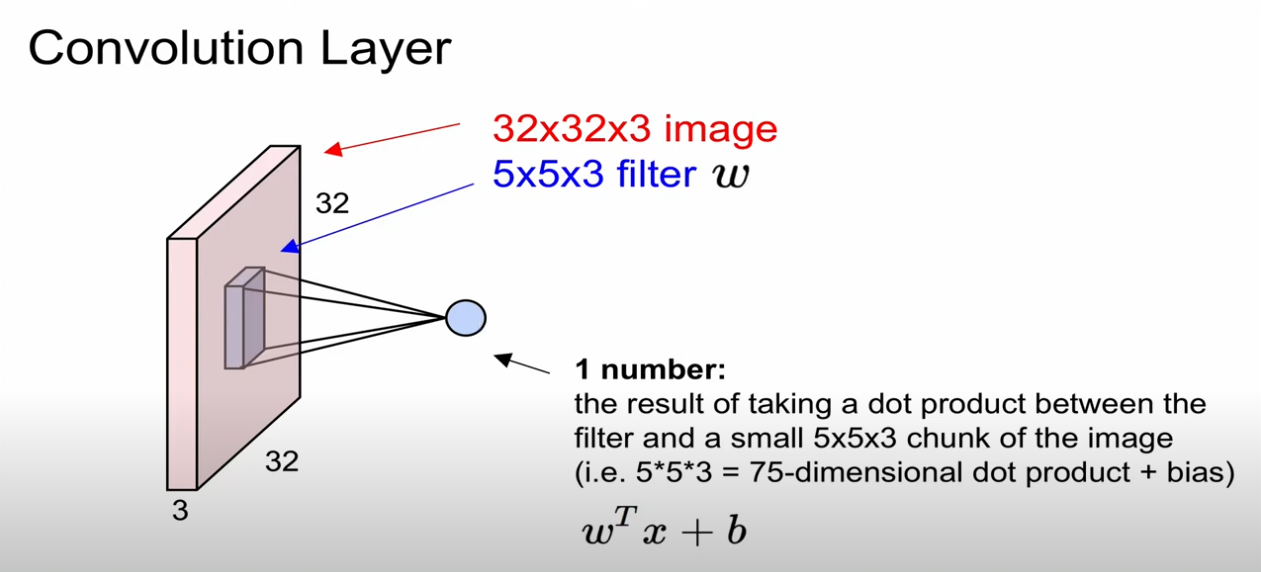

- 한 위치에서 convolution(합성곱)한다고 하면, 하나의 숫자를 반환하게 된다.

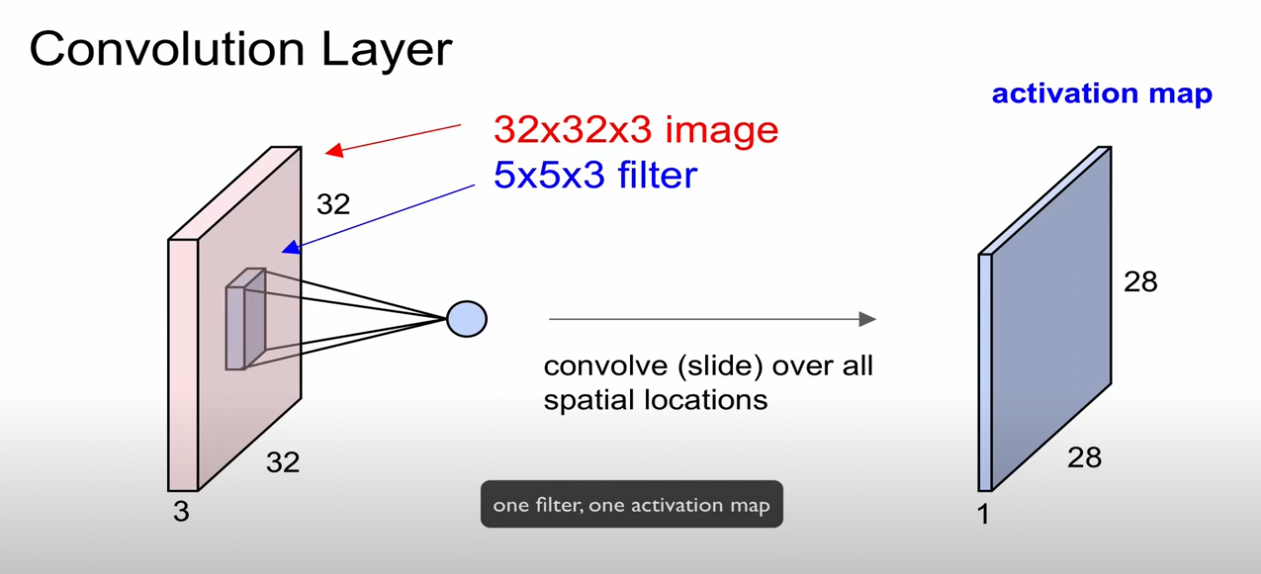

- **하나의 필터** -> **하나의 Activation map**이 나온다.

- 필터가 여섯개라면,


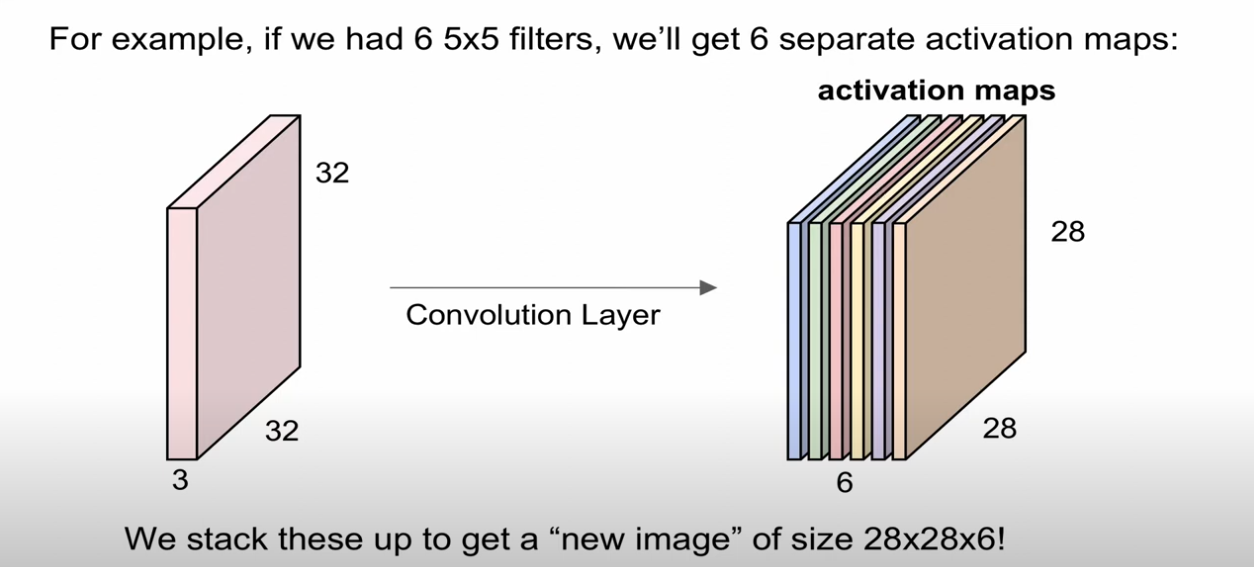

- 필터를 거치게 되면, 28 X 28 X 6 인 새로운 이미지를 얻게 된다.

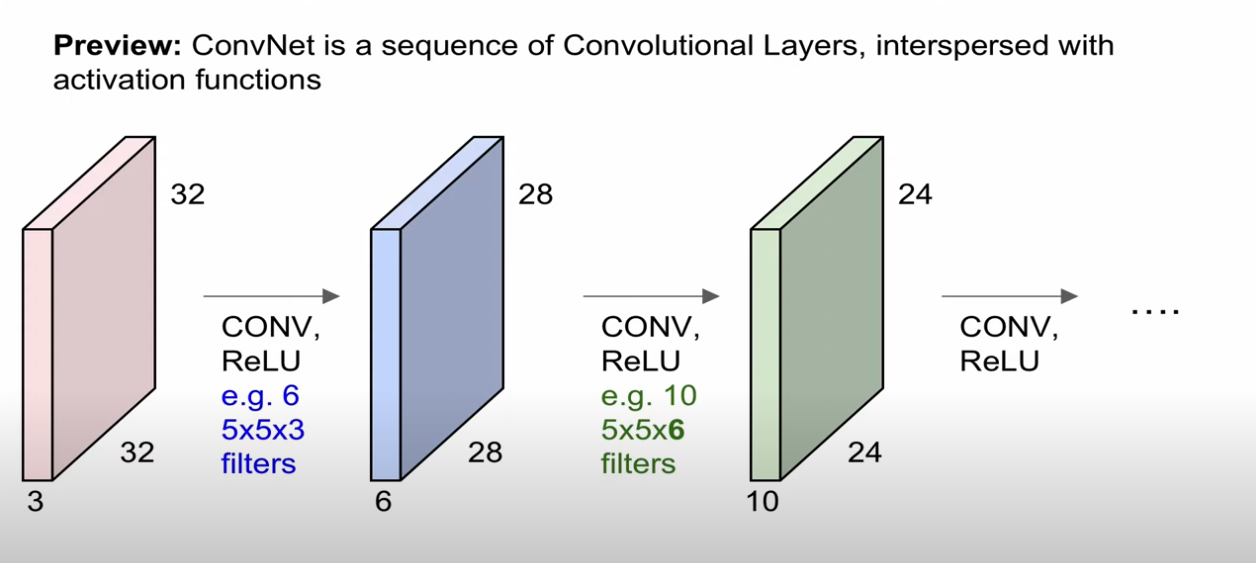

- 전체적인 구조를 봤을 때, 이런 구조를 가지게 된다.
- 앞에도 말했듯, 깊이는 필터의 개수와 같다.

- 궁극적으로, 우리가 업데이트 해나가야 파라미터 값들은 필터 값들이다.

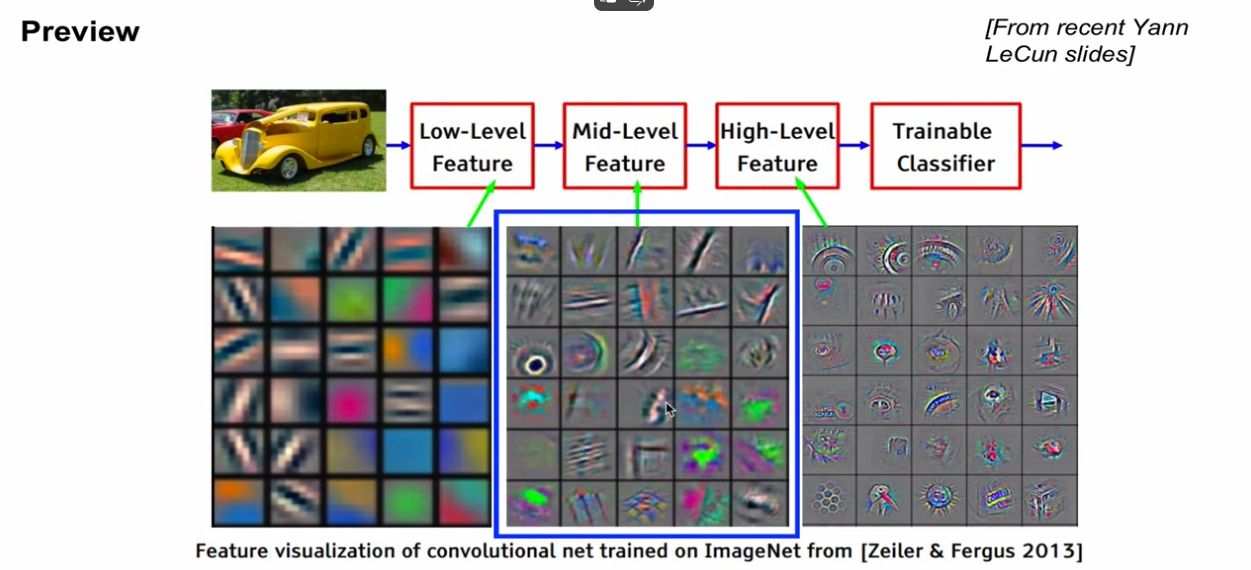

# Low-Level Features






주로 **단순한 패턴**을 추출한다.

- **Edges** 모서리
- **Lines** 선
- **Textures** 질감

**3 x 3 같은 작은 커널**을 사용해, 미세한 특징을 탐지한다.

# Mid-Level Features





조금 더 **복잡한 패턴**을 포착한다.

- **Corners** 모서리
- **Shapes** 형태
- **Parts** 부위

**5 X 5 이상의 큰 커널**을 사용해, 더 넓은 범위를 살펴본다.

# High-Level Features

**추상적이고 복잡한 패턴**을 포착한다.

- **Objects** 물체
- **Scenes** 장면
- **Concepts** 개념

**전체 이미지에서 정보를 조합**하는 역할을 한다. 그래서 **Fully Connected Layer** 같은 구조가 여기에 해당한다.

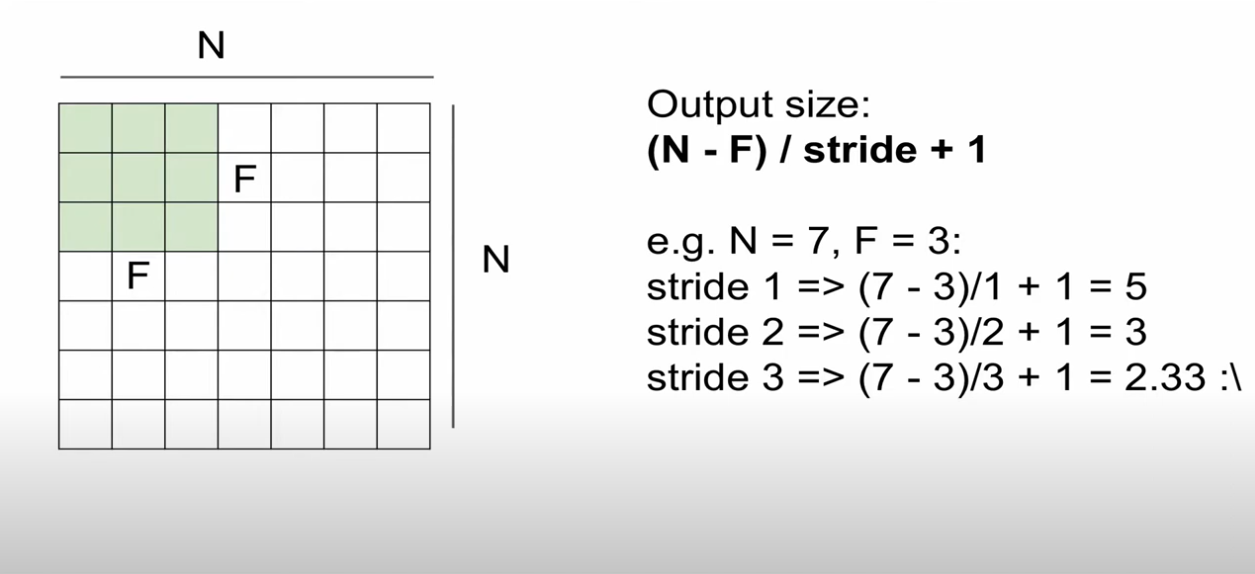

- Stride는 필터의 중심이 얼만큼 몇 칸을 이동할 것인지를 지정하는 것이다.


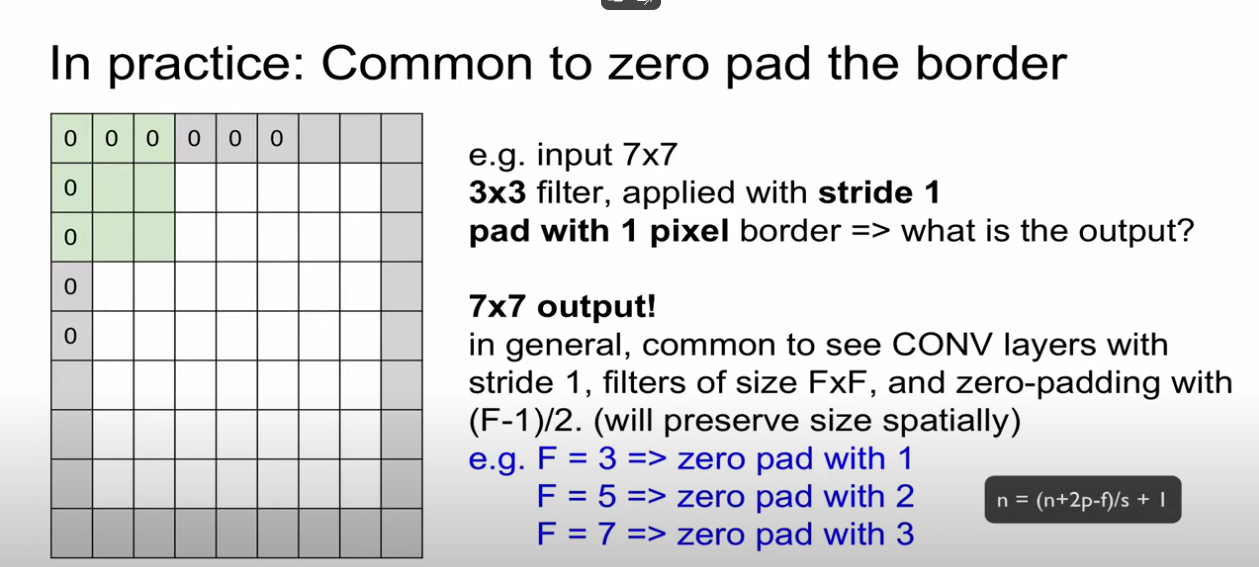

- Padding을 사용하는 이유는 이미지의 사이즈를 보존하기 위해서 사용한다.



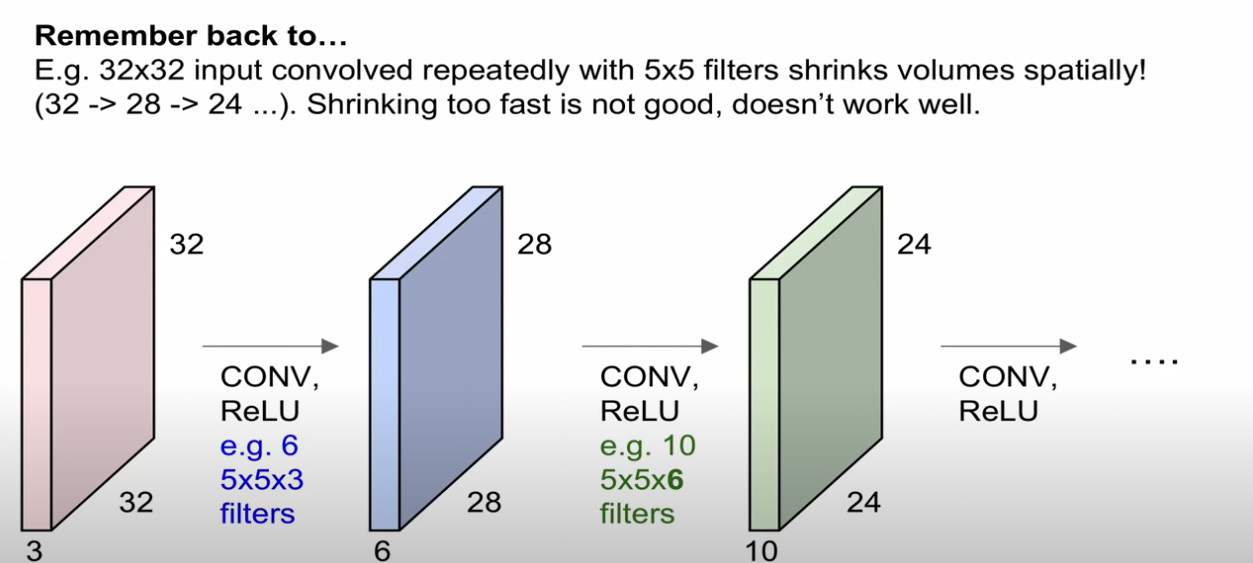

- Padding이 중요한 이유는 앞서 봤듯이, 32 -> 28 -> 24로 빠르게 볼륨이 줄어들다 보면 금방 0으로 수렴하기 때문에 패딩을 사용해주어야 한다.

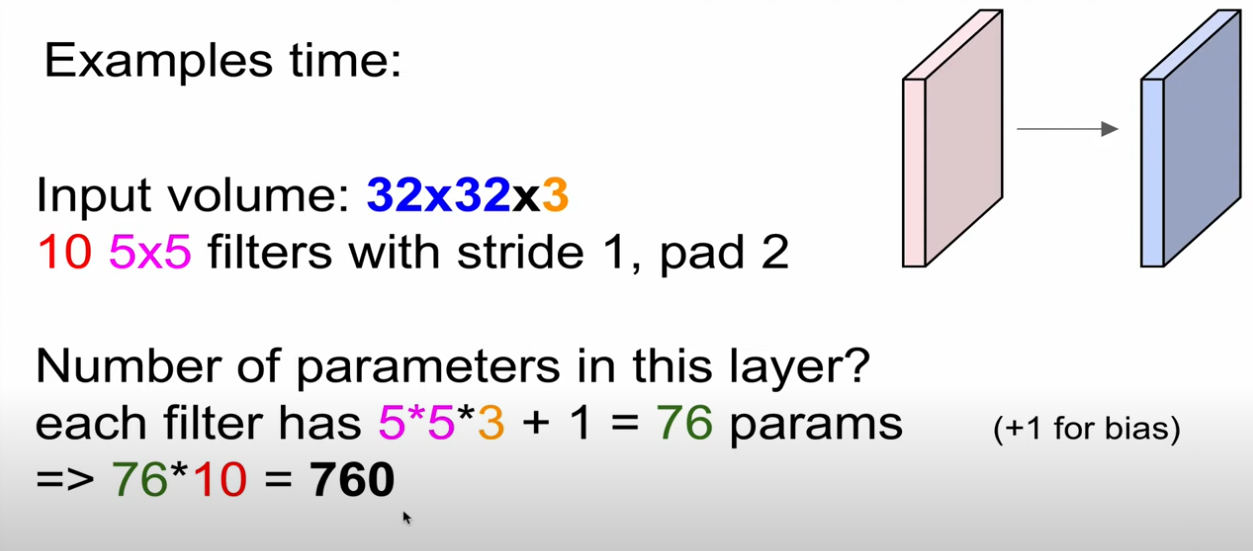

- Input Volume = 32 X 32 X 3(depth)
- Filters = 10 X (5 X 5 X 3 + 1) = 760

정답은 Parameter = Filter = 760 이다.  

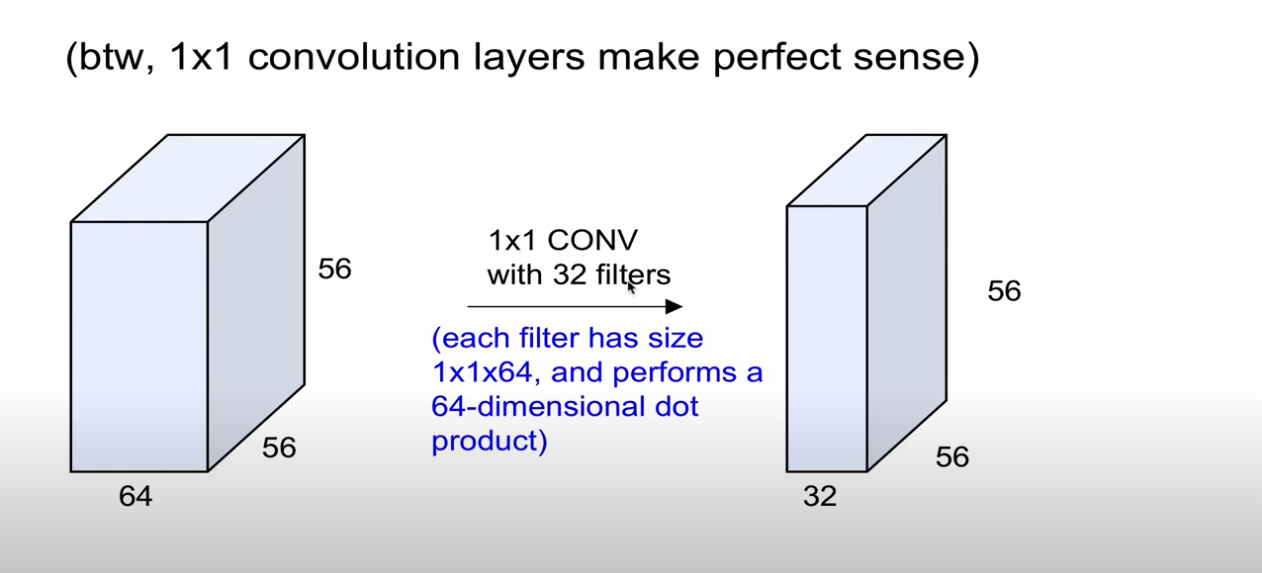

- 2차원 이미지 56 X 56 이었다면, 의미없을 수 있다.

- 그러나, 3차원 이미지 56 X 56 X 64에서 dot production하면 56 x 56 X 32 결과를 얻을 수 있기 때문에 의미가 있다.

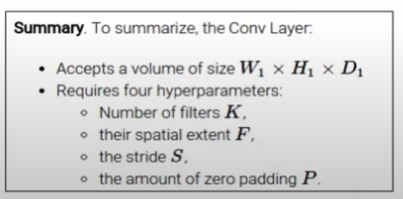

- 컨볼루션 레이어는 반드시 4가지 파라미터를 가지고 있다.

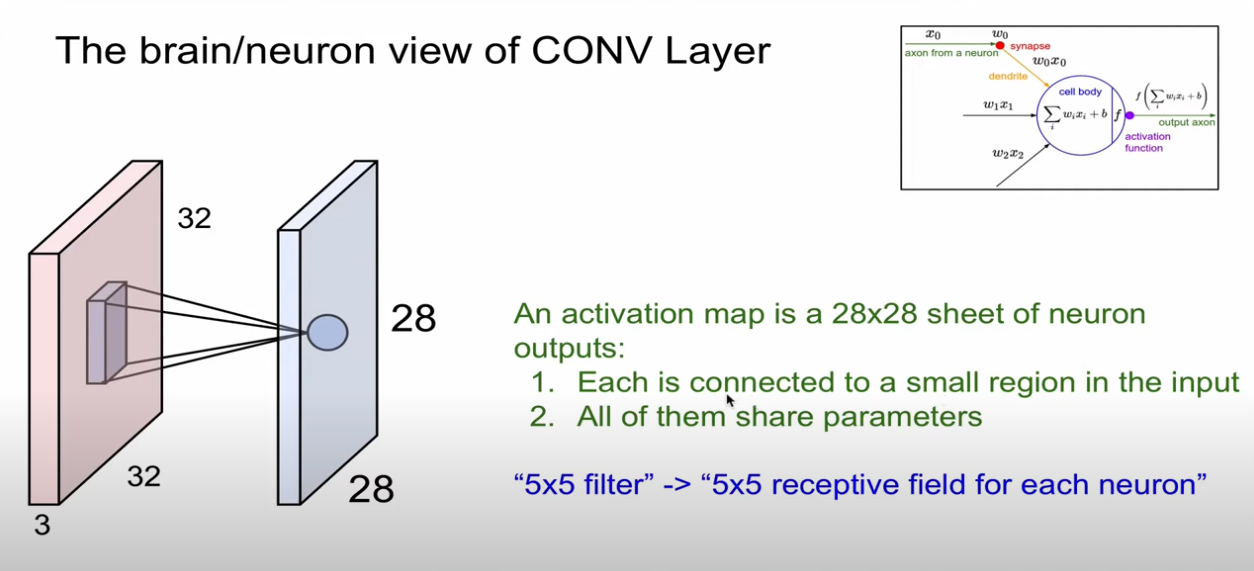

이미지의 한 위치를 예를 들어서,

하나의 activation map 안에서의

- 한 뉴런은 이미지의 한 부분과 연결되어 있다.
- 같은 필터(weights)로 만들기 때문에 같은 파라미터들을 공유(share)한다.


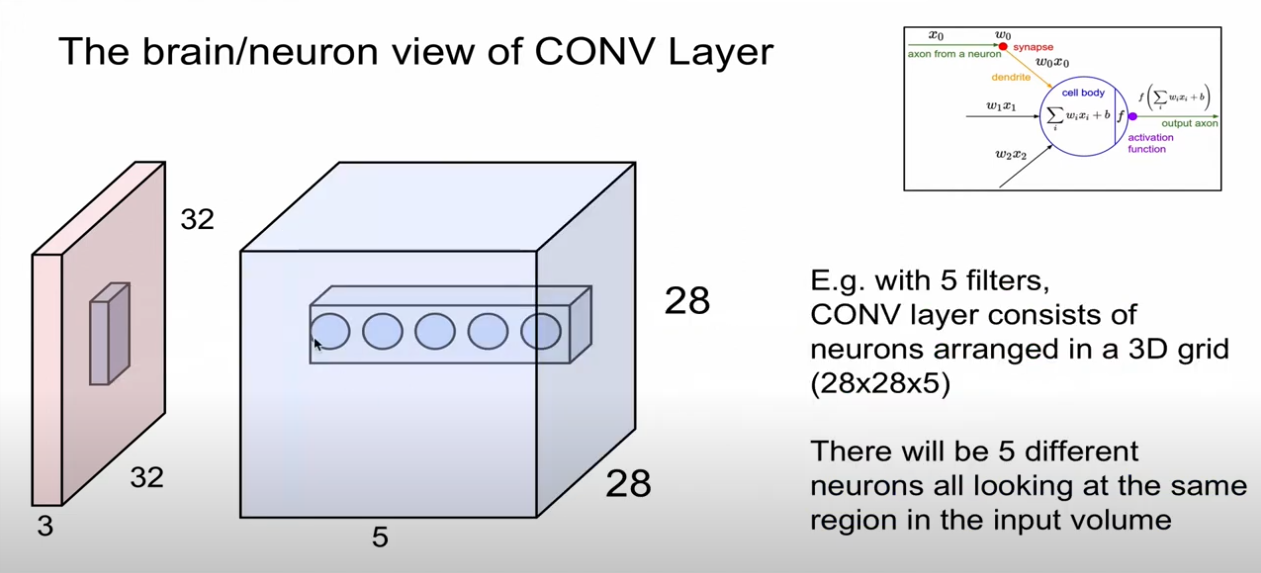

- input에서 같은 지역이랑 연결되어 있는 5개의 뉴런들이 있다.
- 5개의 각 뉴런들은 다른 Activation map에 속해 있기 때문에 각각 다른 가중치들이 적용되어 있다.

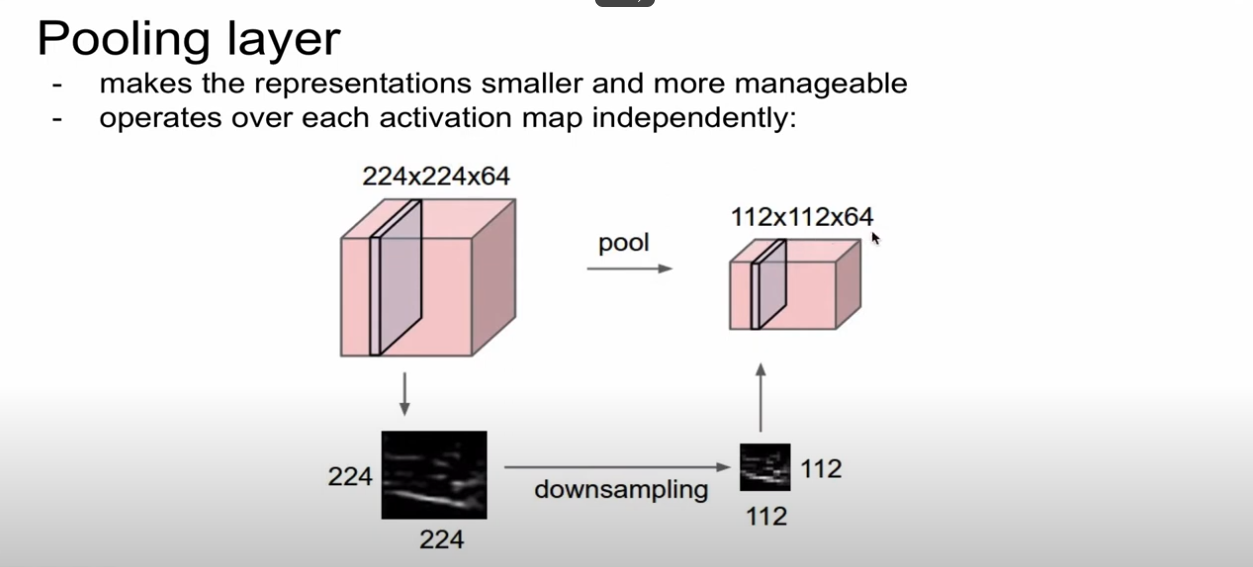

- Convolution layer에서는 이미지 사이즈를 유지한다.

- Pooling layer는 이미지의 사이즈를 관리한다.

- Depth는 항상 유지된다.

# *파라미터나 패딩이 없다는 것에 주목한다.

- 가중치를 학습하는 게 아니라, 단순히 정해진 규칙에 따라 값을 고르기만 하기 때문이다.

- 패딩은 커널 가장자리에서 잘라먹는 픽셀을 보완하기 위해 사용한다. 하지만 Pooling layer에서는 이미 크기를 줄이는 게 목적이라, 굳이 패딩을 써서 크기를 유지할 필요가 없다.

# Transfer Learning 전이학습



전이 학습은 기존에 잘 훈련된 모델의 지식을 새로운 문제에 "전이"시키는 것이다.



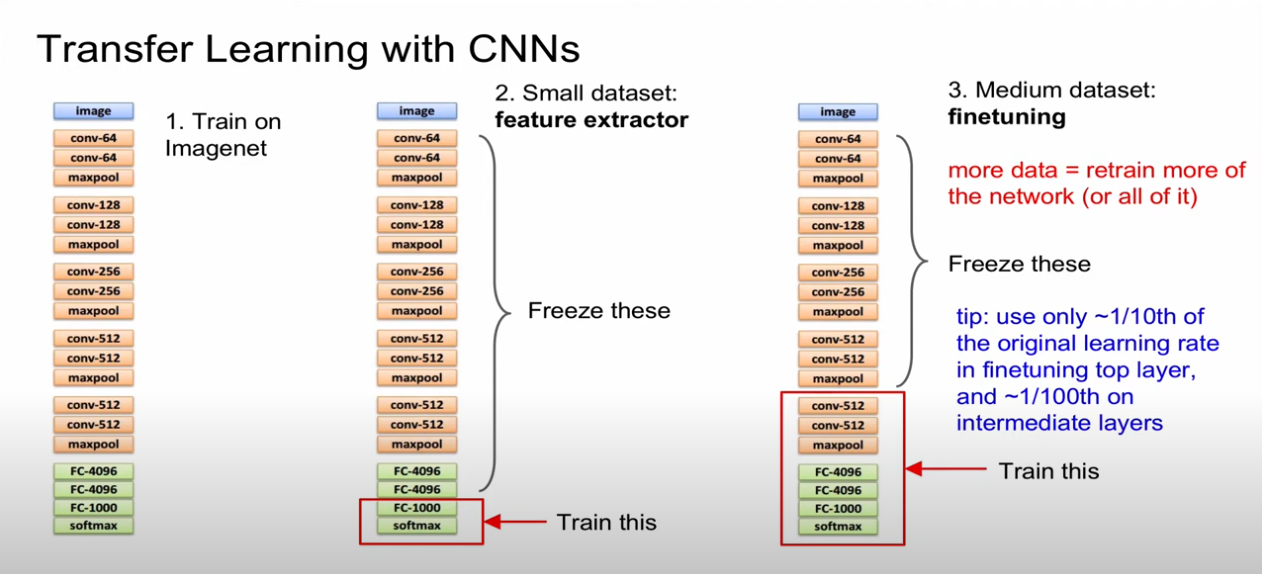

1. 학습되어 있는 모델 (Imagenet)

2. 작은 데이터셋
  - 중간 부분을 Feature extractor(특징추출)로 사용한다.


3. 중간 크기의 데이터셋
  - finetuning 을 사용한다.
  - 더 큰 데이터 일 수록 네트워크를 더 많이 사용하는 거다.
  - 밑단 부터 윗단으로 올라간다.

  
예를 들어,

  개, 고양이, 새 같은 이미지들로 학습이 되어 있는 모델이라 하더라도,
  
  - 모델의 윗단(Top layer)은 선, 모서리, 색깔과 같이 Low Level에 있기 때문에 대부분 일반적인 것을 추출해낸다.

  - 모델의 아랫 단(Bottom layer)으로 내려갈 수록 객체, 개념 등으로 더 구체적인 것을 추출 하기 때문에, 데이터가 많아질 수록 아랫 단(bottom)에서 윗단(top)으로 Freezing을 푼다.



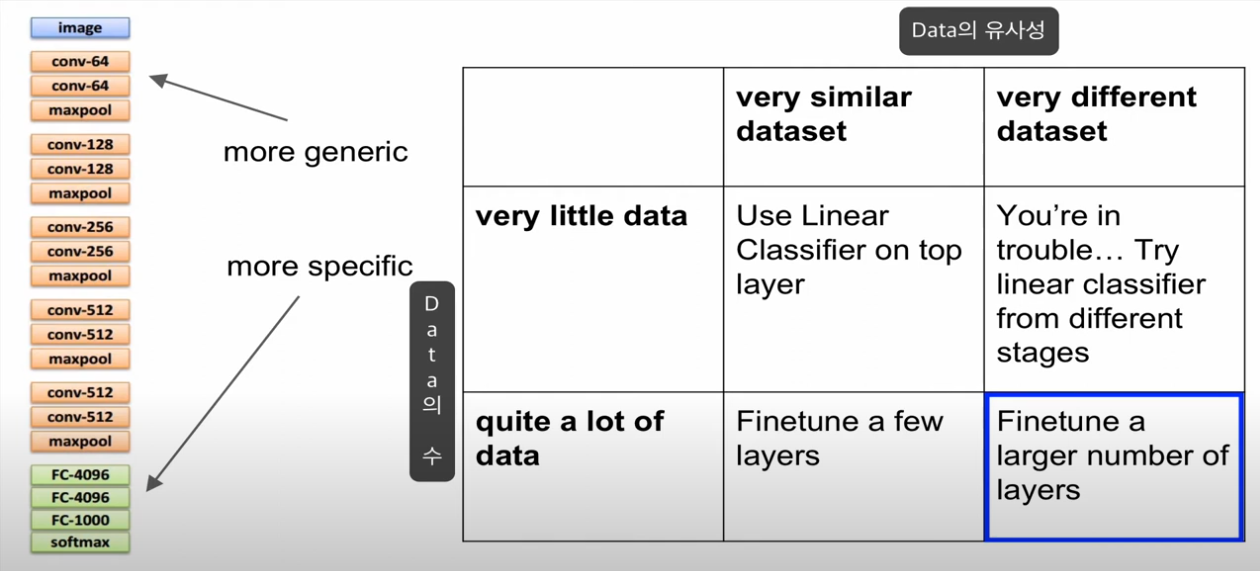

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../data/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../data/',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 142MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 9.48MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 101MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.70MB/s]


In [2]:
# Convolutional neural network (two convolutional layers)
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

model = ConvNet(num_classes).to(device)

# nn.Conv2d() = Convolution layer

- 역할 : 입력 이미지에 커널(필터)를 적용해 특징(feature)를 추출한다.

- in_channels : 입력 이미지의 채널 수
  
  - 흑백 : 1
  
  - 컬러 : 3 (RGB)

- out_channels : 출력 채널 수 -> **필터 개수**를 의미한다.

- kernel_size : 필터 크기
  - ex) (5, 5) = 5 X 5

- stride : 필터 이동 크기
- padding: 이미지 경계에 0 추가


# nn.BatchNorm2D(num_features) = 2D Batch Normalization

- 각 배치의 출력을 정규화 해주는 단계이다.
- 활성화 함수(ReLU)를 통과하기 전에 적용하는게 일반적이라고 한다.


# out.reshape (Tensor Reshaping)

- 뒤에 Fully Connected Layer를 위해서 평탄화 해주어야 한다.

예를 들어,
- out = out.reshape(out.size(0), -1)

입력 크기가 (64, 32, 7, 7)일 때:

- out.size(0) = 64 = 배치 크기
- -1 = 32 x 7 x 7 = 1568

결과적으로, (64,1588) 바뀐다.

# nn.Linear(7 x 7 x 32, num_classes)가 되는 이유

- layer1

  - 28 x 28 -> 14 x 14 (Maxpooling)  
  - channel = 16

- layer2
  - 14 x 14 -> 7 x 7 (Maxpooling)
  - channel = 32

- numclass = 10

In [3]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Epoch [1/5], Step [100/600], Loss: 0.1343
Epoch [1/5], Step [200/600], Loss: 0.1305
Epoch [1/5], Step [300/600], Loss: 0.0825
Epoch [1/5], Step [400/600], Loss: 0.0599
Epoch [1/5], Step [500/600], Loss: 0.0446
Epoch [1/5], Step [600/600], Loss: 0.0421
Epoch [2/5], Step [100/600], Loss: 0.0425
Epoch [2/5], Step [200/600], Loss: 0.0469
Epoch [2/5], Step [300/600], Loss: 0.0551
Epoch [2/5], Step [400/600], Loss: 0.0500
Epoch [2/5], Step [500/600], Loss: 0.1133
Epoch [2/5], Step [600/600], Loss: 0.0158
Epoch [3/5], Step [100/600], Loss: 0.0108
Epoch [3/5], Step [200/600], Loss: 0.0447
Epoch [3/5], Step [300/600], Loss: 0.0370
Epoch [3/5], Step [400/600], Loss: 0.1668
Epoch [3/5], Step [500/600], Loss: 0.0223
Epoch [3/5], Step [600/600], Loss: 0.0471
Epoch [4/5], Step [100/600], Loss: 0.0377
Epoch [4/5], Step [200/600], Loss: 0.0455
Epoch [4/5], Step [300/600], Loss: 0.0137
Epoch [4/5], Step [400/600], Loss: 0.0227
Epoch [4/5], Step [500/600], Loss: 0.0387
Epoch [4/5], Step [600/600], Loss:

ADAM (Adaptive Moment Estimation)

1. adam을 사용하는 이유는
  - adam은 학습 속도가 빠르고, 복잡한 데이터에서도 안정적으로 수렴한다.
  - 매 파라미터마다 학습률을 자동 조정해줘서, 최적화 과정이 훨씬 부드러워요.
    - 변화가 큰 파라미터 -> 학습률 낮춤
    - 변화가 적은 파라미터 -> 학습률 낮춤

2. 두가지 최적화 기법
  - Momentum : 이전 기울기 정보를 활용해 학습 방향을 부드럽게 조정
  - RMSProp: 학습률을 각 파라미터마다 다르게 조정

3. adam은 언제 사용할까
  - 데이터가 복잡하거나 고차원일 때
      - CNN 처럼 많은 파라미터를 학습할 때 adam이 잘맞는다.
  - 최적화 속도를 높일 때
      - SGD보다 빠르게 수렴하는 경우가 많다.
  - 학습률 튜닝에 자신 없을 때

4. 일반화 성능은 SGD with momentum가 더 좋다고 한다.
 - 일반화 성능이란 모델이 훈련되지 않은 새로운 데이터에서도 잘 작동하는 능력을 말한다.